<a href="https://colab.research.google.com/github/valixonov04/small_projects/blob/main/cours_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/data/archive/data 2/archive/mitbih_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/data/archive/data 2/archive/mitbih_test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
9.779411554336547852e-01,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
9.264705777168273926e-01,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
6.813725233078002930e-01,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
2.450980395078659058e-01,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
1.544117629528045654e-01,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.84,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.85,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.86,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.87,87553.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


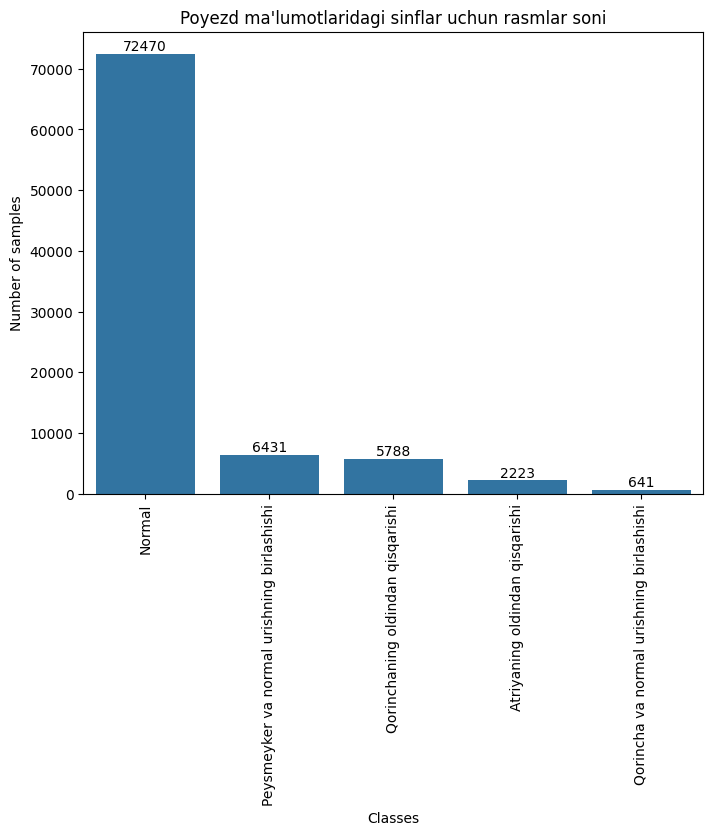

In [ ]:
labels = {
    0: "Normal",
    1: "Atriyaning oldindan qisqarishi",
    2: "Qorinchaning oldindan qisqarishi",
    3: "Qorincha va normal urishning birlashishi",
    4: "Peysmeyker va normal urishning birlashishi"
}


train_counts = train_data.iloc[:,-1].value_counts().rename(labels)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=train_counts.index, y=train_counts.values)

for i, p in enumerate(ax.patches):
    ax.annotate(f'{train_counts[i]}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10)

plt.title("Poyezd ma'lumotlaridagi sinflar uchun rasmlar soni")
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.xticks(rotation=90)
plt.show()

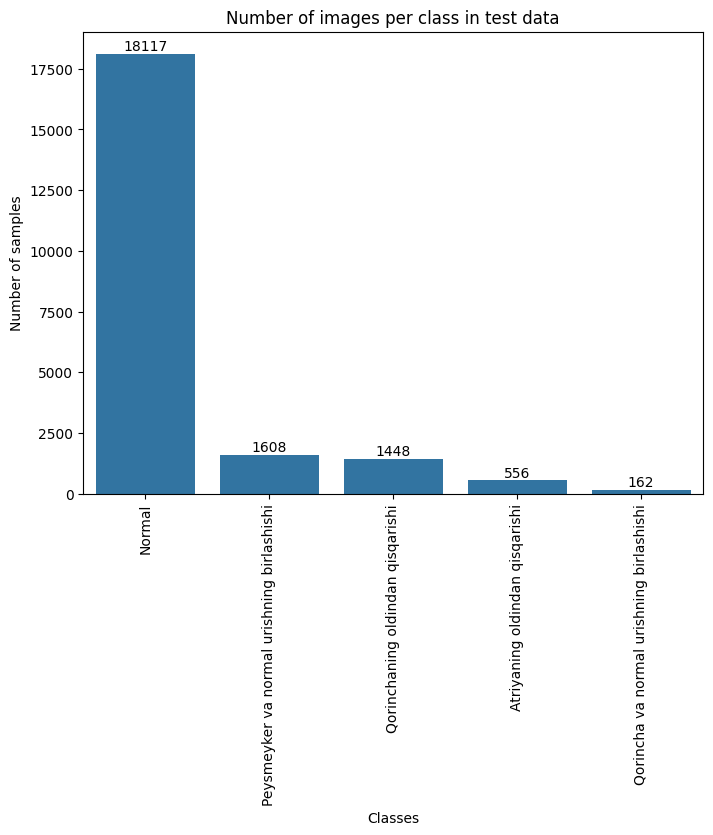

In [ ]:
test_counts = test_data.iloc[:,-1].value_counts().rename(labels)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=test_counts.index, y=test_counts.values)

for i, p in enumerate(ax.patches):
    ax.annotate(f'{test_counts[i]}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Number of images per class in test data')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.xticks(rotation=90)
plt.show()

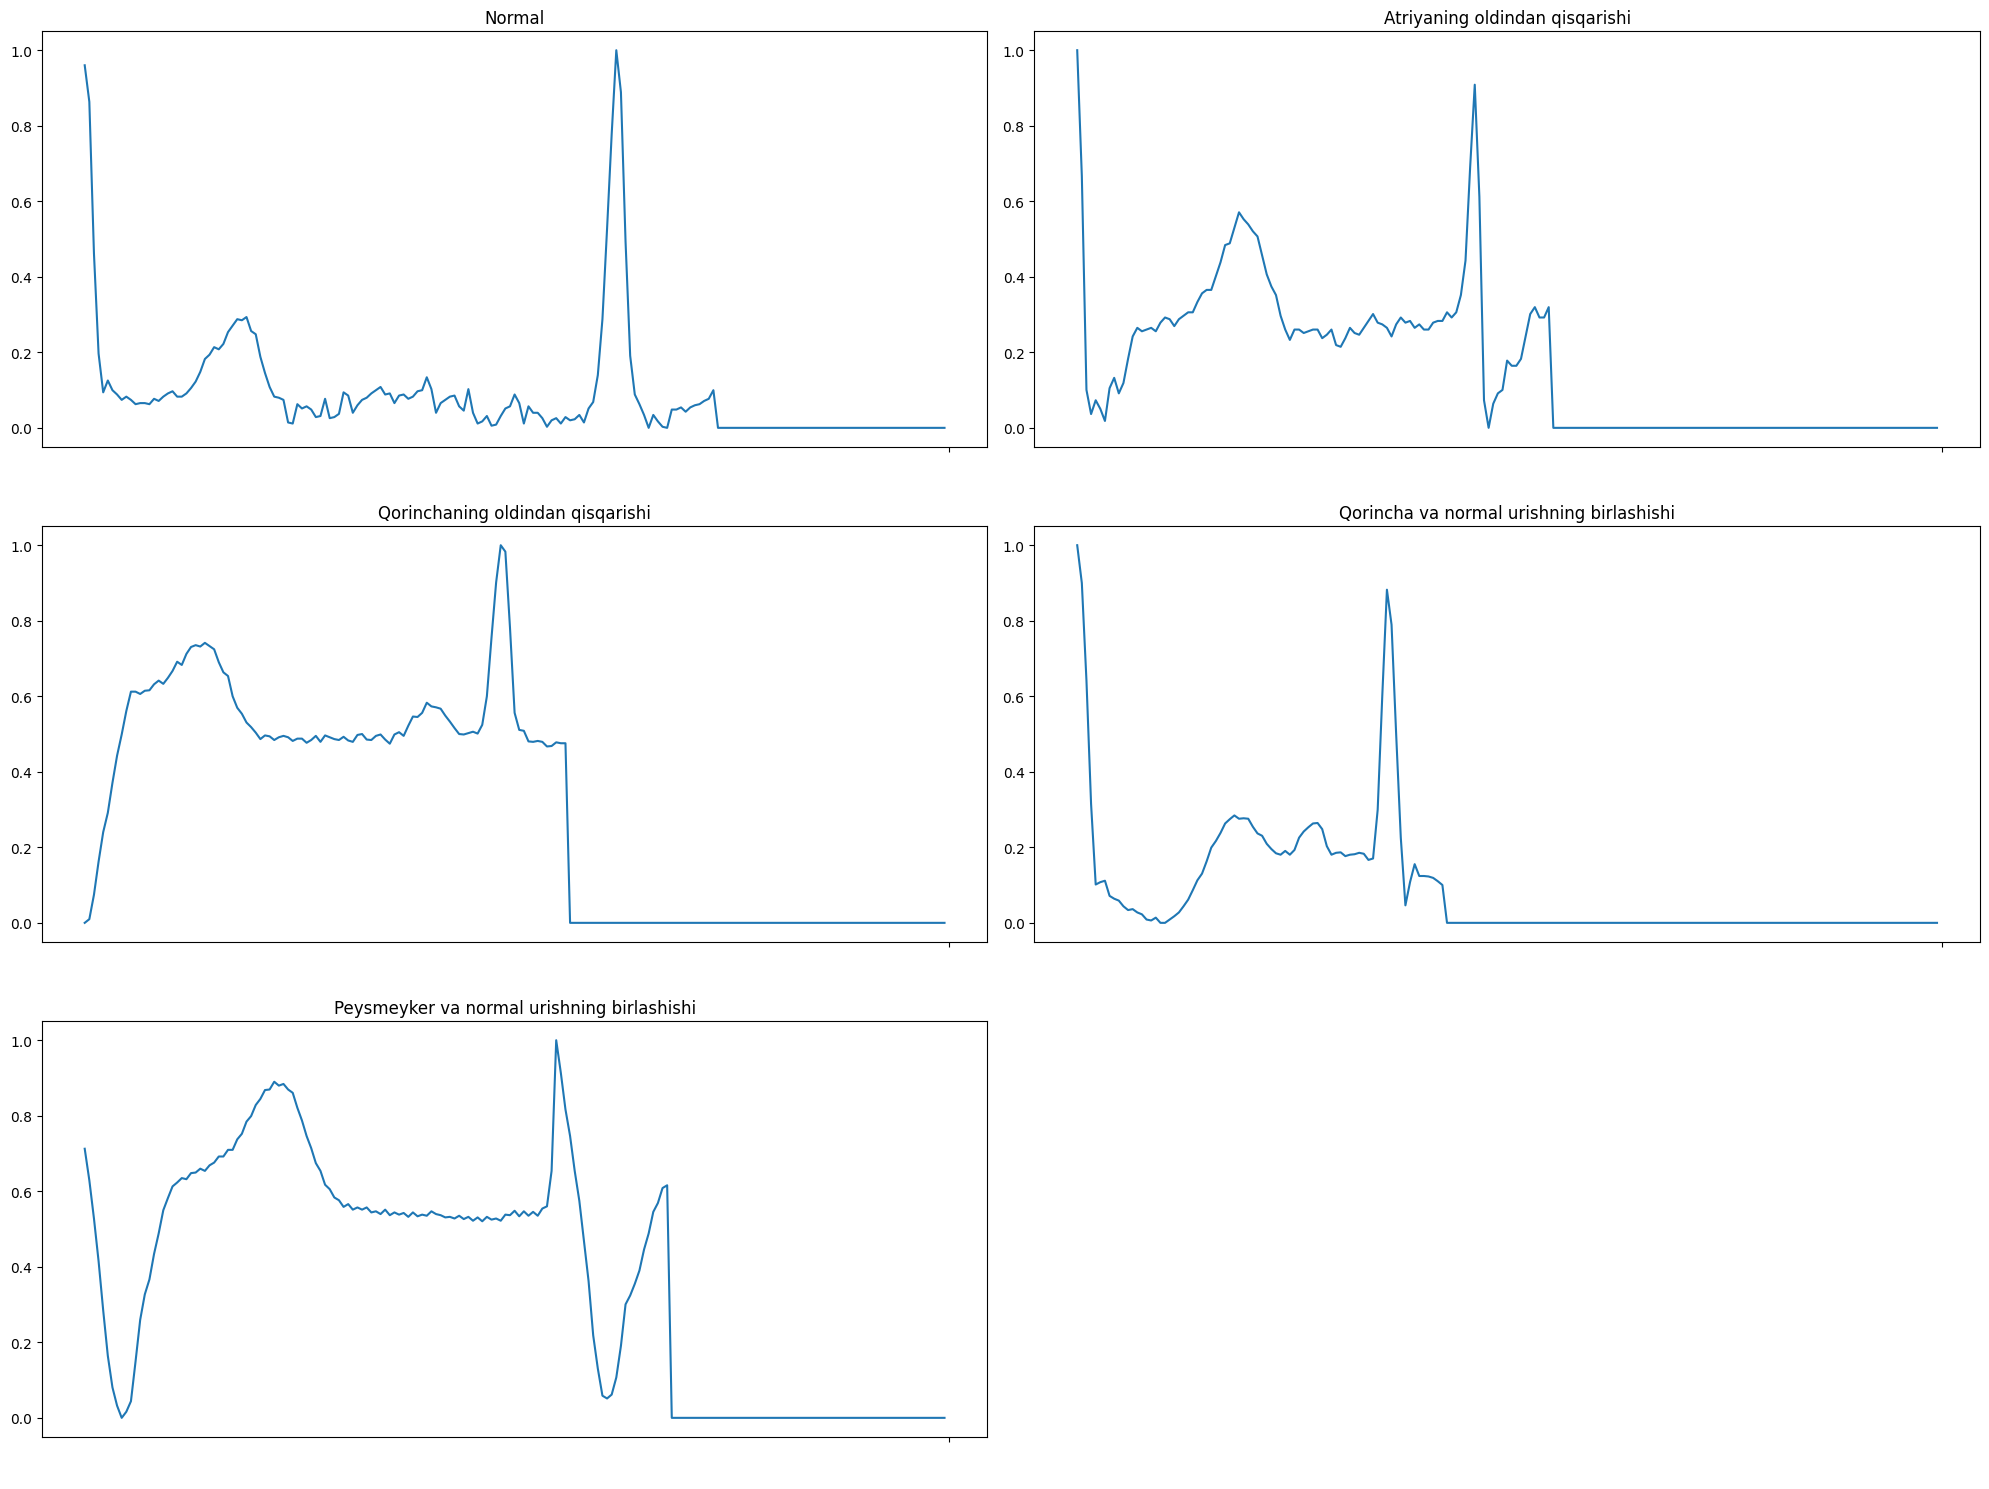

In [ ]:
train_classes = train_data.iloc[:, -1].unique()

plt.figure(figsize=(20, 15))

for i, cls in enumerate(train_classes):
    plt.subplot(3, 2, i + 1)
    plt.plot(train_data[train_data.iloc[:, -1] == cls].iloc[0, :-1])
    plt.title(f'{list(labels.values())[i]}')
    plt.xlabel(" ")
    plt.xticks(ticks=" ",labels =" ",rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_test_samples = X_test_scaled.shape[0]

X_val, X_test_new, y_val, y_test_new = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42, stratify=y_test)

X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_new = np.reshape(X_test_new, (X_test_new.shape[0], X_test_new.shape[1], 1))

print(f"Yangi o‘quv to‘plami hajmi: {X_train_scaled.shape[0]}")
print(f"Tasdiqlash to‘plami hajmi: {X_val.shape[0]}")
print(f"Sinov to‘plami hajmi:{X_test_new.shape[0]}")

Yangi o‘quv to‘plami hajmi: 87553
Tasdiqlash to‘plami hajmi: 10945
Sinov to‘plami hajmi:10946


In [ ]:
def build_complex_lstm_model():
    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(32))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(5, activation='softmax'))

    return model

model = build_complex_lstm_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 92, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 90, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 45, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 45, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 45, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,493 (873.02 KB)

 Trainable params: 223,109 (871.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

lstm_history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)

Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8617 - loss: 0.5190
Epoch 1: val_accuracy improved from -inf to 0.94436, saving model to best_lstm_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 55s 16ms/step - accuracy: 0.8617 - loss: 0.5189 - val_accuracy: 0.9444 - val_loss: 0.1933 - learning_rate: 0.0010
Epoch 2/20
2734/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9501 - loss: 0.1935
Epoch 2: val_accuracy improved from 0.94436 to 0.96336, saving model to best_lstm_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - accuracy: 0.9501 - loss: 0.1935 - val_accuracy: 0.9634 - val_loss: 0.1506 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9612 - loss: 0.1497
Epoch 3: val_accuracy improved from 0.96336 to 0.97021, saving model to best_lstm_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 84s 16ms/step - accuracy: 0.9612 - loss: 0.1497 - val_accuracy: 0.9702 - val_loss: 0.1233 - learning_rate: 0.0010
Epoch 4/20
2737/273

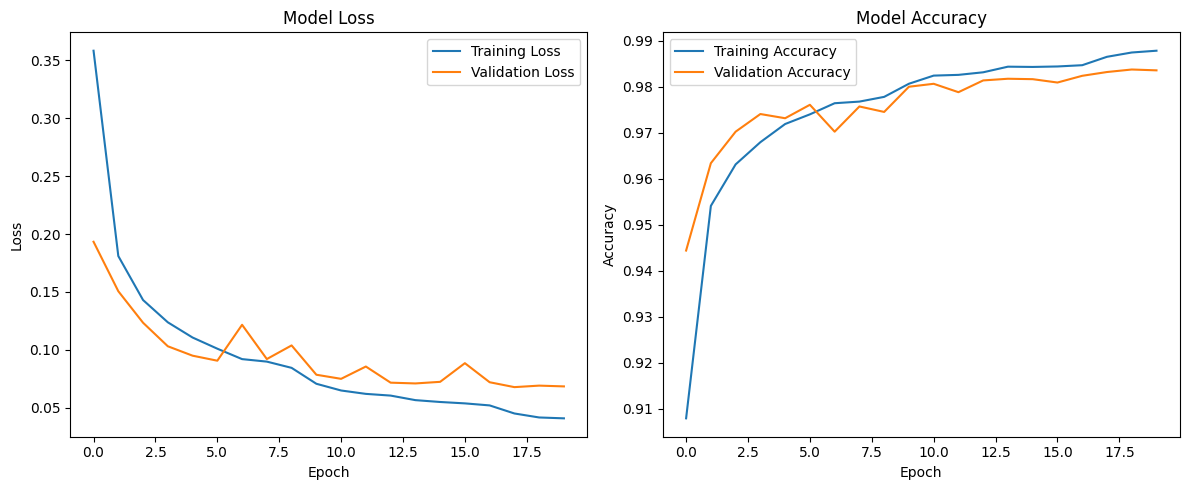

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


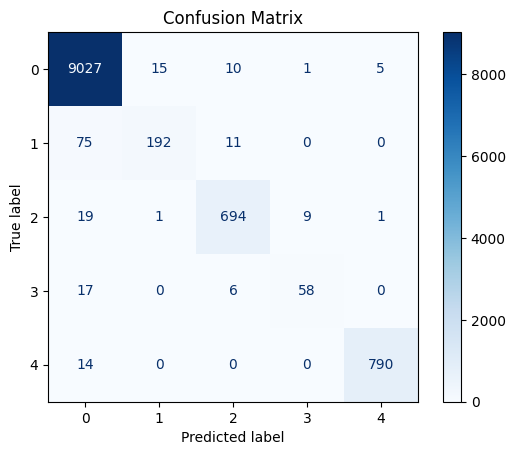

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9058
         1.0       0.92      0.69      0.79       278
         2.0       0.96      0.96      0.96       724
         3.0       0.85      0.72      0.78        81
         4.0       0.99      0.98      0.99       804

    accuracy                           0.98     10945
   macro avg       0.94      0.87      0.90     10945
weighted avg       0.98      0.98      0.98     10945



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = y_val

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


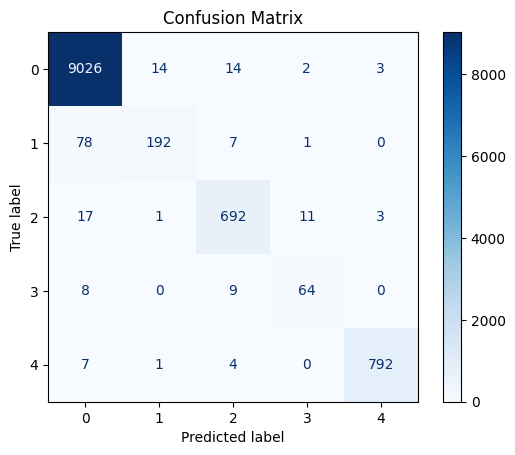

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9059
         1.0       0.92      0.69      0.79       278
         2.0       0.95      0.96      0.95       724
         3.0       0.82      0.79      0.81        81
         4.0       0.99      0.99      0.99       804

    accuracy                           0.98     10946
   macro avg       0.94      0.88      0.91     10946
weighted avg       0.98      0.98      0.98     10946



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = np.argmax(model.predict(X_test_new), axis=1)
y_true = y_test_new

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

**GRU**

In [ ]:
from tensorflow.keras.utils import to_categorical
if len(y_train.shape) == 1:
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_val = to_categorical(y_val, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)
else:
    num_classes = y_train.shape[1]

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

def build_gru_model(input_shape, num_classes):
    model = Sequential()
    model.add(GRU(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

gru_model = build_gru_model(input_shape, num_classes)

gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_gru_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

gru_history = gru_model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, model_checkpoint, early_stopping]
)

Epoch 1/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8585 - loss: 0.5500
Epoch 1: val_accuracy improved from -inf to 0.92810, saving model to best_gru_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 66s 23ms/step - accuracy: 0.8586 - loss: 0.5500 - val_accuracy: 0.9281 - val_loss: 0.2769 - learning_rate: 0.0010
Epoch 2/20
2736/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9326 - loss: 0.2549
Epoch 2: val_accuracy improved from 0.92810 to 0.94491, saving model to best_gru_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9326 - loss: 0.2549 - val_accuracy: 0.9449 - val_loss: 0.2076 - learning_rate: 0.0010
Epoch 3/20
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9544 - loss: 0.1762
Epoch 3: val_accuracy improved from 0.94491 to 0.96418, saving model to best_gru_model.keras
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9544 - loss: 0.1762 - val_accuracy: 0.9642 - val_loss: 0.1423 - learning_rate: 0.0010
Epoch 4/20
2737/2737 ━

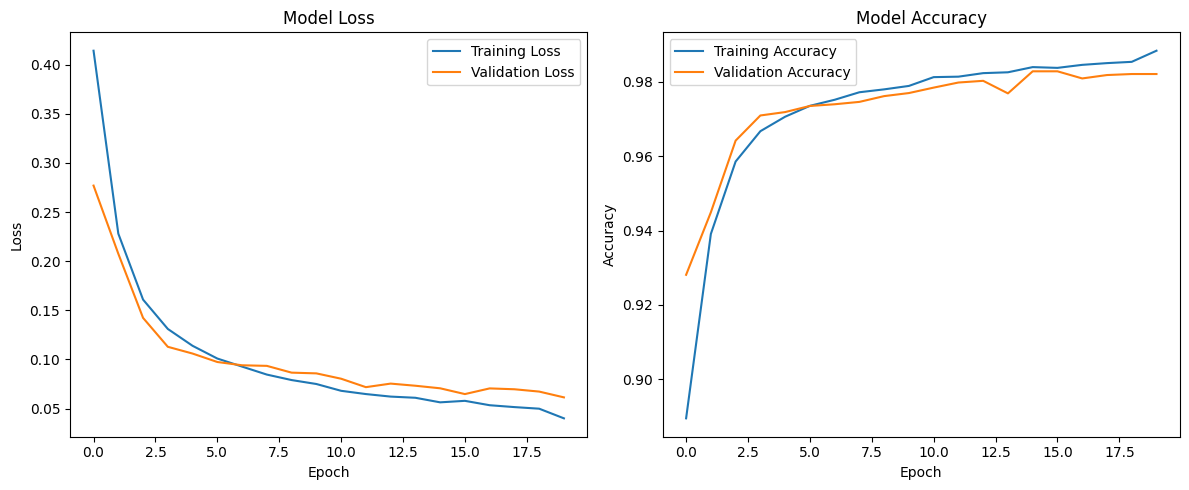

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


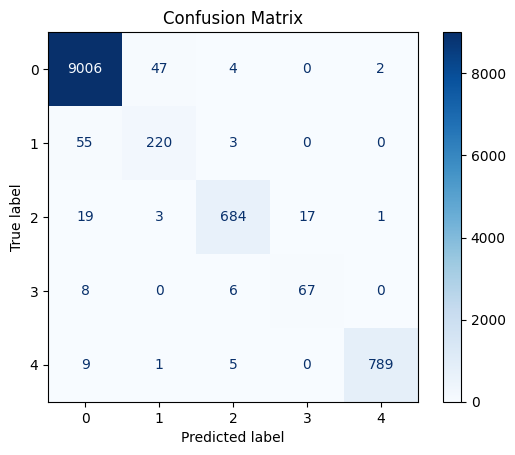

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9059
         1.0       0.81      0.79      0.80       278
         2.0       0.97      0.94      0.96       724
         3.0       0.80      0.83      0.81        81
         4.0       1.00      0.98      0.99       804

    accuracy                           0.98     10946
   macro avg       0.91      0.91      0.91     10946
weighted avg       0.98      0.98      0.98     10946



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = np.argmax(gru_model.predict(X_test_new), axis=1)
y_true = y_test_new

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred))